# Supervised, Multi-Class Classification of Scam Reports: Analysis of Results

The objective of this Python notebook is to analyse the results of the models trained in Experiments 1, 2 and 3. The main goal is to select the best multi-class classification model.

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import plotnine as p9
from plotnine import *
%pprint

Pretty printing has been turned OFF


## Define functions

In [2]:
def extract_scores(filename):
    
    """This function reads a CSV file from a filepath and extracts the precision, recall and f1-scores."""
    
    p = pd.read_csv(filename).loc[0:5,["Unnamed: 0", "precision"]]
    r = pd.read_csv(filename).loc[0:5,["Unnamed: 0", "recall"]]
    f = pd.read_csv(filename).loc[0:5,["Unnamed: 0", "f1-score"]]
     
    return p, r, f

In [3]:
def read_csv(path):
    
    """This function reads a CSV file from a specified filepath, while preserving the data types of each variable.
    Source: https://stackoverflow.com/questions/50047237/how-to-preserve-dtypes-of-dataframes-when-using-to-csv/50051542#50051542"""
    
    # Read types first line of csv
    dtypes = {key:value for (key,value) in pd.read_csv(path, nrows=1).iloc[0].to_dict().items() if 'date' not in value}

    parse_dates = [key for (key,value) in pd.read_csv(path, 
                   nrows=1).iloc[0].to_dict().items() if 'date' in value]
    
    # Read the rest of the lines with the types from above
    return pd.read_csv(path, dtype=dtypes, parse_dates=parse_dates, skiprows=[1])

## Load the results

In [4]:
df1 = pd.read_csv("Results/scam_classification_results.csv").drop(columns="Unnamed: 0")
df2 = pd.read_csv("Results/scam_classification_results_augmented_text.csv").drop(columns="Unnamed: 0")
df3 = pd.read_csv("Results/scam_classification_results_smote.csv").drop(columns="Unnamed: 0")

In [5]:
# Combine all three results dataframes
df = pd.concat([df1, df2, df3], axis=0).reset_index().drop(columns='index')
df['model'] = pd.Series(pd.Categorical(list(df.model), categories=["RNN","LSTM","BiLSTM"], ordered=False))
df['time'] = round(df['time']/60,1)
df['mode'] = df['mode'].replace(1, 'Experiment 1')
df['mode'] = df['mode'].replace(2, 'Experiment 2')
df['mode'] = df['mode'].replace(3, 'Experiment 3')
df['glove'] = df['glove'].replace('N', 'Without GloVe')
df['glove'] = df['glove'].replace('Y', 'With GloVe')
df

,model,combi,mode,glove,fold_max,mean_acc,time,test_acc
0,RNN,1,Experiment 1,Without GloVe,3,58.9,10.7,57.9
1,LSTM,1,Experiment 1,Without GloVe,1,85.2,22.6,81.9
2,BiLSTM,1,Experiment 1,Without GloVe,2,84.3,42.0,84.4
3,RNN,2,Experiment 1,With GloVe,2,62.3,8.8,61.4
4,LSTM,2,Experiment 1,With GloVe,4,86.9,26.4,86.6
5,BiLSTM,2,Experiment 1,With GloVe,4,86.9,48.7,85.5
6,RNN,3,Experiment 2,Without GloVe,5,27.3,11.9,67.1
7,LSTM,3,Experiment 2,Without GloVe,5,66.7,26.0,90.4
8,BiLSTM,3,Experiment 2,Without GloVe,5,65.7,47.1,88.1
9,RNN,4,Experiment 2,With GloVe,3,34.4,9.0,60.7


## Assessing Effectiveness of GloVe embeddings

### Overall

In [6]:
df.groupby(by="glove").mean()[['test_acc']]

,test_acc
glove,
With GloVe,75.555556
Without GloVe,75.333333


### By Models

In [7]:
df[df["model"] == "RNN"].groupby(by="glove").mean()[['test_acc']]

,test_acc
glove,
With GloVe,56.266667
Without GloVe,59.133333


In [8]:
df[df["model"] == "LSTM"].groupby(by="glove").mean()[['test_acc']]

,test_acc
glove,
With GloVe,85.933333
Without GloVe,82.666667


In [9]:
df[df["model"] == "BiLSTM"].groupby(by="glove").mean()[['test_acc']]

,test_acc
glove,
With GloVe,84.466667
Without GloVe,84.200000


### By Experiments

In [10]:
df[df["mode"] == "Experiment 1"].groupby(by="glove").mean()[['test_acc']]

,test_acc
glove,
With GloVe,77.833333
Without GloVe,74.733333


In [11]:
df[df["mode"] == "Experiment 2"].groupby(by="glove").mean()[['test_acc']]

,test_acc
glove,
With GloVe,79.033333
Without GloVe,81.866667


In [12]:
df[df["mode"] == "Experiment 3"].groupby(by="glove").mean()[['test_acc']]

,test_acc
glove,
With GloVe,69.8
Without GloVe,69.4


## Analysing Training Time

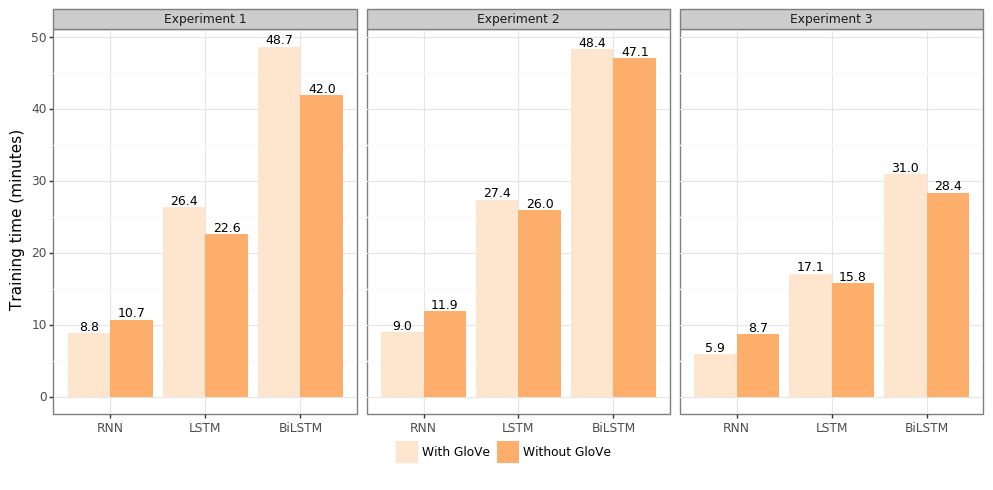

<ggplot: (-9223371866078996324)>

In [13]:
g1 = (p9.ggplot(data=df,
        mapping=p9.aes(x='model', fill='glove'))
+ p9.geom_col(mapping=p9.aes(y='time'), position='dodge', show_legend=True)
+ p9.facet_wrap("~mode", ncol=3, scales='free_x')
+ p9.theme_bw() 
+ p9.ylab("Training time (minutes)")
+ p9.xlab("") 
+ p9.theme(legend_title=element_blank(), legend_position='bottom', subplots_adjust={'wspace': 0.03}, figure_size=(12, 5), axis_text_x = p9.element_text(rotation=0))
+ p9.geom_text(p9.aes(y='time', label='time'), position=position_dodge(width=0.9), size=9, va='bottom')
+ p9.scale_fill_brewer(type='seq', palette='Oranges', direction=1)      
)

g1

In [14]:
# Save the plot
# g1.save("Figures/result_training_time.png", width=10, height=5, dpi=800)

## Analysing Models' Performance by Test Accuracy

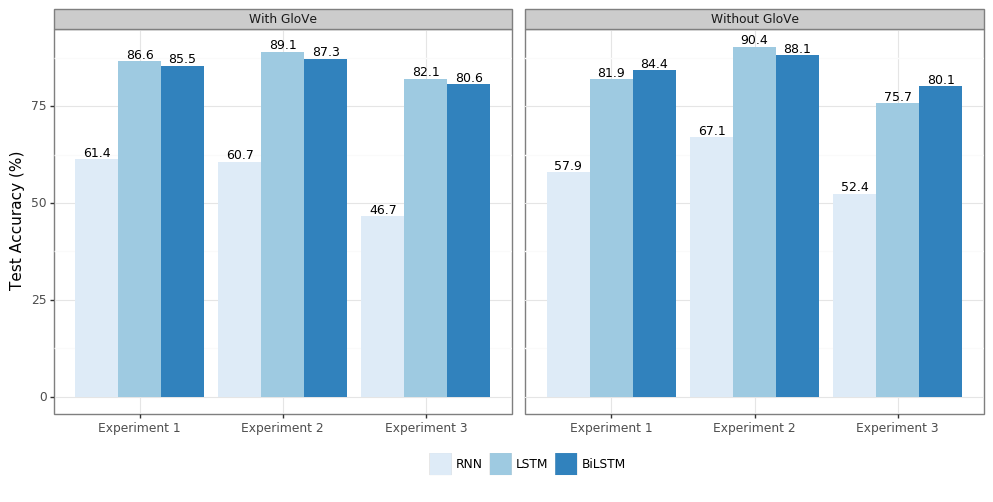

<ggplot: (-9223371866078537724)>

In [15]:
g2 = (p9.ggplot(data=df,
        mapping=p9.aes(x='mode', fill='model'))
+ p9.geom_col(mapping=p9.aes(y='test_acc'), position='dodge', show_legend=True)
+ p9.facet_wrap("~glove", ncol=2, scales='free_x')
+ p9.theme_bw() 
+ p9.ylab("Test Accuracy (%)")
+ p9.xlab("") 
+ p9.theme(legend_title=element_blank(), legend_position=(.52, 0.01), legend_direction='horizontal', subplots_adjust={'wspace': 0.03}, figure_size=(12, 5), axis_text_x = p9.element_text(rotation=0))
+ p9.geom_text(p9.aes(y='test_acc', label='test_acc'), position=position_dodge(width=0.9), size=9, va='bottom')
+ p9.scale_fill_brewer(type='seq', palette='Blues', direction=1)
)

g2

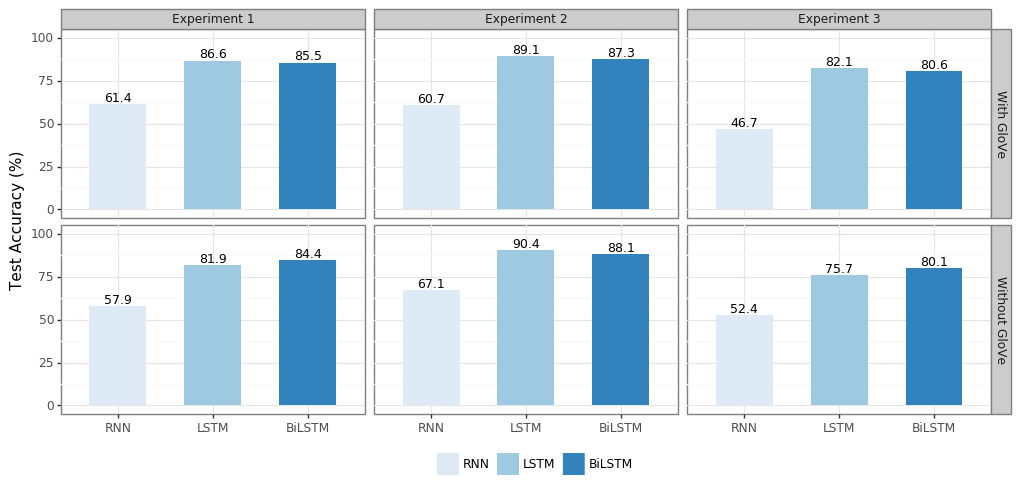

<ggplot: (-9223371866078635036)>

In [16]:
g3 = (p9.ggplot(data=df,
        mapping=p9.aes(x='model', fill='model'))
+ p9.geom_col(mapping=p9.aes(y='test_acc'), width=0.60, position='dodge', show_legend=True)
+ p9.facet_grid("glove ~ mode") 
+ p9.theme_bw() 
+ p9.ylab("Test Accuracy (%)")
+ p9.ylim(0, 100)
+ p9.xlab("") 
+ p9.theme(legend_title=element_blank(), legend_position=(.52, 0.01), legend_direction='horizontal', subplots_adjust={'wspace': 0.03}, figure_size=(12, 5), axis_text_x = p9.element_text(rotation=0))
+ p9.geom_text(p9.aes(y='test_acc', label='test_acc'), position=position_dodge(width=0.9), size=9, va='bottom')
+ p9.scale_fill_brewer(type='seq', palette='Blues', direction=1)
)

g3

In [17]:
# Save the plot
# g3.save("Figures/result_test_accuracy.png", width=10, height=5, dpi=800)

## Analysing Models' Performance by Precision, Recall and F1-Scores

### Precision, Recall and F1-Scores for RNNs

In [18]:
exp_list = ['', '_Glove',  '_Augmented_Text', '_Augmented_Text_Glove',  '_SMOTE', '_SMOTE_Glove']
model_list = ['RNN', 'LSTM', 'BiLSTM']

In [19]:
# For RNNs
rnn_precision_df = pd.DataFrame()
rnn_recall_df = pd.DataFrame()
rnn_f1_df = pd.DataFrame()
for i in range(len(exp_list)):
    filename = "Results/Classification_Reports/Scam_Classifier" + exp_list[i] + "-best-" + model_list[0] + ".csv"
    p, r, f = extract_scores(filename)
    if i == 0:
        rnn_precision_df = p
        rnn_recall_df = r
        rnn_f1_df = f
    else:
        rnn_precision_df = pd.concat([rnn_precision_df, p], axis=1)
        rnn_recall_df = pd.concat([rnn_recall_df, r], axis=1)
        rnn_f1_df = pd.concat([rnn_f1_df, f], axis=1)

rnn_precision_df = rnn_precision_df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
rnn_precision_df.columns = ["scam_type", 1, 2, 3, 4, 5, 6]
rnn_df = pd.melt(rnn_precision_df, id_vars=['scam_type'])

rnn_recall_df = rnn_recall_df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
rnn_recall_df.columns = ["scam_type", 1, 2, 3, 4, 5, 6]
rnn_df = pd.concat([rnn_df, pd.melt(rnn_recall_df, id_vars=['scam_type']).loc[:, ['value']]], axis=1)

rnn_f1_df = rnn_f1_df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
rnn_f1_df.columns = ["scam_type", 1, 2, 3, 4, 5, 6]
rnn_df = pd.concat([rnn_df, pd.melt(rnn_f1_df, id_vars=['scam_type']).loc[:, ['value']]], axis=1)

rnn_df.columns = ['scam_type', 'combi', 'precision', 'recall', 'f1-score']

glove_list = [["N"] * 6, ["Y"] * 6, ["N"] * 6, ["Y"] * 6, ["N"] * 6, ["Y"] * 6]
glove_list = [j for i in glove_list for j in i]

exp_list4 = [["Experiment 1"] * 12, ["Experiment 2"] * 12, ["Experiment 3"] * 12]
exp_list4 = [j for i in exp_list4 for j in i]

model_list4 = [['RNN'] * 36]
model_list4 = [j for i in model_list4 for j in i]

rnn_df['glove'] = glove_list
rnn_df['experiment'] = exp_list4
rnn_df['model'] = model_list4
rnn_df = rnn_df.round(2)

rnn_df.head()

,scam_type,combi,precision,recall,f1-score,glove,experiment,model
0,Credit-for-Sex Scam,1,0.00,0.00,0.00,N,Experiment 1,RNN
1,Home/Room Rental Scam,1,0.00,0.00,0.00,N,Experiment 1,RNN
2,Impersonation Scam,1,0.84,0.93,0.88,N,Experiment 1,RNN
3,Internet Love Scam,1,0.33,0.48,0.39,N,Experiment 1,RNN
4,Investment Scam,1,0.00,0.00,0.00,N,Experiment 1,RNN


### Precision, Recall and F1-Scores for LSTMs

In [20]:
# For LSTMs
lstm_precision_df = pd.DataFrame()
lstm_recall_df = pd.DataFrame()
lstm_f1_df = pd.DataFrame()
for i in range(len(exp_list)):
    filename = "Results/Classification_Reports/Scam_Classifier" + exp_list[i] + "-best-" + model_list[1] + ".csv"
    p, r, f = extract_scores(filename)
    if i == 0:
        lstm_precision_df = p
        lstm_recall_df = r
        lstm_f1_df = f
    else:
        lstm_precision_df = pd.concat([lstm_precision_df, p], axis=1)
        lstm_recall_df = pd.concat([lstm_recall_df, r], axis=1)
        lstm_f1_df = pd.concat([lstm_f1_df, f], axis=1)
        
lstm_precision_df = lstm_precision_df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
lstm_precision_df.columns = ["scam_type", 1, 2, 3, 4, 5, 6]
lstm_df = pd.melt(lstm_precision_df, id_vars=['scam_type'])

lstm_recall_df = lstm_recall_df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
lstm_recall_df.columns = ["scam_type", 1, 2, 3, 4, 5, 6]
lstm_df = pd.concat([lstm_df, pd.melt(lstm_recall_df, id_vars=['scam_type']).loc[:, ['value']]], axis=1)

lstm_f1_df = lstm_f1_df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
lstm_f1_df.columns = ["scam_type", 1, 2, 3, 4, 5, 6]
lstm_df = pd.concat([lstm_df, pd.melt(lstm_f1_df, id_vars=['scam_type']).loc[:, ['value']]], axis=1)

lstm_df.columns = ['scam_type', 'combi', 'precision', 'recall', 'f1-score']

glove_list = [["N"] * 6, ["Y"] * 6, ["N"] * 6, ["Y"] * 6, ["N"] * 6, ["Y"] * 6]
glove_list = [j for i in glove_list for j in i]

exp_list2 = [["Experiment 1"] * 12, ["Experiment 2"] * 12, ["Experiment 3"] * 12]
exp_list2 = [j for i in exp_list2 for j in i]

model_list2 = [['LSTM'] * 36]
model_list2 = [j for i in model_list2 for j in i]

lstm_df['glove'] = glove_list
lstm_df['experiment'] = exp_list2
lstm_df['model'] = model_list2
lstm_df = lstm_df.round(2)

lstm_df.head()

,scam_type,combi,precision,recall,f1-score,glove,experiment,model
0,Credit-for-Sex Scam,1,0.79,0.77,0.78,N,Experiment 1,LSTM
1,Home/Room Rental Scam,1,0.72,0.80,0.76,N,Experiment 1,LSTM
2,Impersonation Scam,1,0.93,0.89,0.91,N,Experiment 1,LSTM
3,Internet Love Scam,1,0.78,0.80,0.79,N,Experiment 1,LSTM
4,Investment Scam,1,0.57,0.66,0.61,N,Experiment 1,LSTM


### Precision, Recall and F1-Scores for Bi-LSTMs

In [21]:
# For Bi-LSTMs
bilstm_precision_df = pd.DataFrame()
bilstm_recall_df = pd.DataFrame()
bilstm_f1_df = pd.DataFrame()
for i in range(len(exp_list)):
    filename = "Results/Classification_Reports/Scam_Classifier" + exp_list[i] + "-best-" + model_list[2] + ".csv"
    p, r, f = extract_scores(filename)
    if i == 0:
        bilstm_precision_df = p
        bilstm_recall_df = r
        bilstm_f1_df = f
    else:
        bilstm_precision_df = pd.concat([bilstm_precision_df, p], axis=1)
        bilstm_recall_df = pd.concat([bilstm_recall_df, r], axis=1)
        bilstm_f1_df = pd.concat([bilstm_f1_df, f], axis=1)

bilstm_precision_df = bilstm_precision_df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
bilstm_precision_df.columns = ["scam_type", 1, 2, 3, 4, 5, 6]
bilstm_df = pd.melt(bilstm_precision_df, id_vars=['scam_type'])

bilstm_recall_df = bilstm_recall_df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
bilstm_recall_df.columns = ["scam_type", 1, 2, 3, 4, 5, 6]
bilstm_df = pd.concat([bilstm_df, pd.melt(bilstm_recall_df, id_vars=['scam_type']).loc[:, ['value']]], axis=1)

bilstm_f1_df = bilstm_f1_df.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
bilstm_f1_df.columns = ["scam_type", 1, 2, 3, 4, 5, 6]
bilstm_df = pd.concat([bilstm_df, pd.melt(bilstm_f1_df, id_vars=['scam_type']).loc[:, ['value']]], axis=1)

bilstm_df.columns = ['scam_type', 'combi', 'precision', 'recall', 'f1-score']

glove_list = [["N"] * 6, ["Y"] * 6, ["N"] * 6, ["Y"] * 6, ["N"] * 6, ["Y"] * 6]
glove_list = [j for i in glove_list for j in i]

exp_list3 = [["Experiment 1"] * 12, ["Experiment 2"] * 12, ["Experiment 3"] * 12]
exp_list3 = [j for i in exp_list3 for j in i]

model_list3 = [['BiLSTM'] * 36]
model_list3 = [j for i in model_list3 for j in i]

bilstm_df['glove'] = glove_list
bilstm_df['experiment'] = exp_list3
bilstm_df['model'] = model_list3
bilstm_df = bilstm_df.round(2)

bilstm_df.head()

,scam_type,combi,precision,recall,f1-score,glove,experiment,model
0,Credit-for-Sex Scam,1,0.71,0.62,0.66,N,Experiment 1,BiLSTM
1,Home/Room Rental Scam,1,0.94,0.76,0.84,N,Experiment 1,BiLSTM
2,Impersonation Scam,1,0.94,0.92,0.93,N,Experiment 1,BiLSTM
3,Internet Love Scam,1,0.76,0.85,0.80,N,Experiment 1,BiLSTM
4,Investment Scam,1,0.69,0.62,0.65,N,Experiment 1,BiLSTM


### Visualise precision, recall and f1-scores for all models

In [22]:
all_models_df = pd.concat([rnn_df, lstm_df, bilstm_df], axis=0)
all_models_df['glove'] = all_models_df['glove'].replace('N', 'Without GloVe')
all_models_df['glove'] = all_models_df['glove'].replace('Y', 'With GloVe')
all_models_df['model'] = all_models_df['model'].astype(CategoricalDtype(categories=["RNN","LSTM","BiLSTM"], ordered=True))
all_models_df

,scam_type,combi,precision,recall,f1-score,glove,experiment,model
0,Credit-for-Sex Scam,1,0.00,0.00,0.00,Without GloVe,Experiment 1,RNN
1,Home/Room Rental Scam,1,0.00,0.00,0.00,Without GloVe,Experiment 1,RNN
2,Impersonation Scam,1,0.84,0.93,0.88,Without GloVe,Experiment 1,RNN
3,Internet Love Scam,1,0.33,0.48,0.39,Without GloVe,Experiment 1,RNN
4,Investment Scam,1,0.00,0.00,0.00,Without GloVe,Experiment 1,RNN
...,...,...,...,...,...,...,...,...
31,Home/Room Rental Scam,6,0.78,0.87,0.82,With GloVe,Experiment 3,BiLSTM
32,Impersonation Scam,6,0.96,0.85,0.90,With GloVe,Experiment 3,BiLSTM
33,Internet Love Scam,6,0.87,0.79,0.83,With GloVe,Experiment 3,BiLSTM
34,Investment Scam,6,0.43,0.77,0.55,With GloVe,Experiment 3,BiLSTM


#### Precision

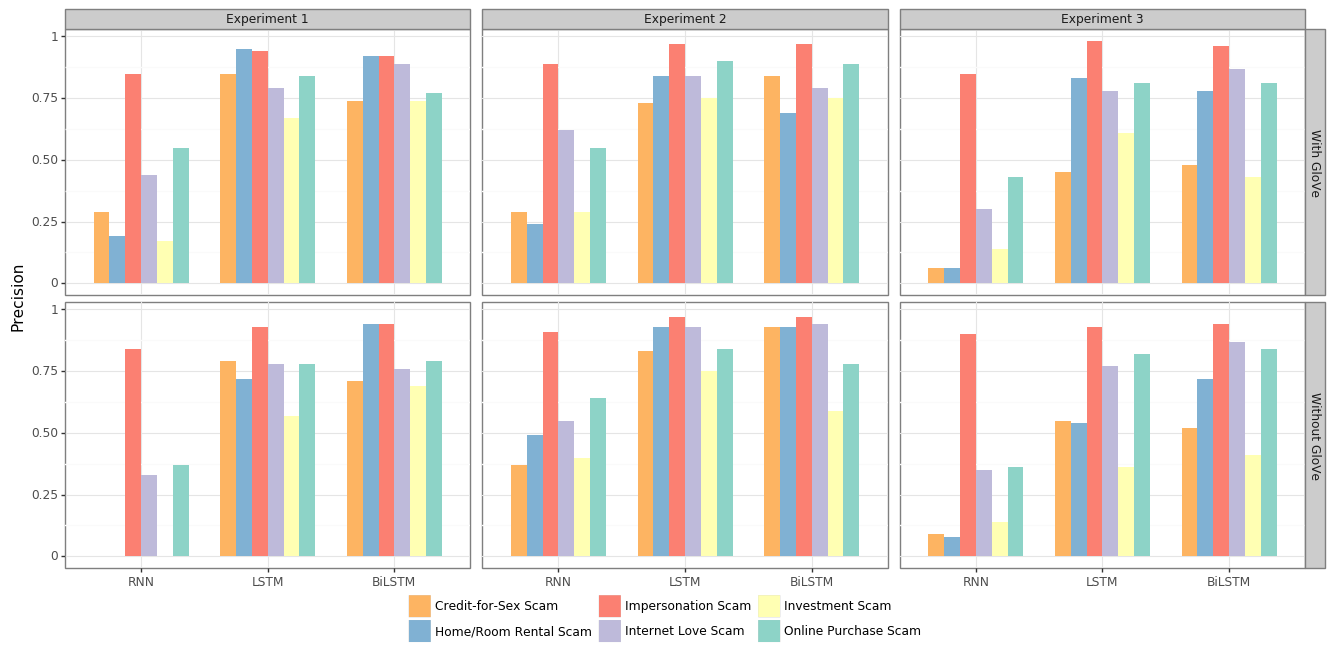

<ggplot: (-9223371866078534964)>

In [23]:
g4 = (p9.ggplot(data=all_models_df,
        mapping=p9.aes(x='model', fill='scam_type'))
+ p9.geom_col(mapping=p9.aes(y='precision'), position='dodge', width=0.75, show_legend=True)
+ p9.facet_grid('glove ~ experiment')
+ p9.theme_bw() 
+ p9.ylab("Precision")
+ p9.xlab("") 
+ p9.theme(legend_title=element_blank(), legend_position='bottom', subplots_adjust={'wspace': 0.03}, figure_size=(16, 7), axis_text_x = p9.element_text(rotation=0))
# + p9.geom_text(p9.aes(y='precision', label='precision', angle=0), position=position_dodge(width=1), size=7, va='bottom', ha='center')
+ p9.scale_fill_brewer(type='qual', palette='Set3', direction=-1)
)

g4

In [24]:
# Save the plot
# g4.save("Figures/precision.png", width=10, height=5, dpi=800)

#### Recall

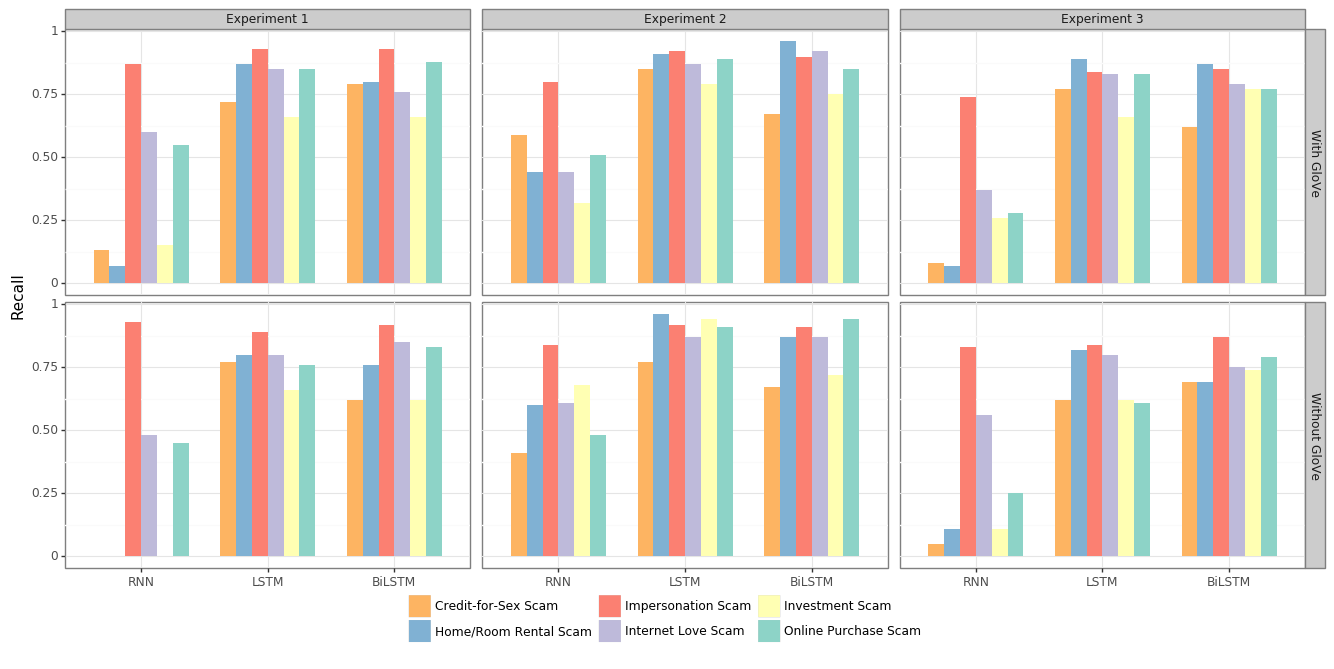

<ggplot: (-9223371866078023728)>

In [25]:
g5 = (p9.ggplot(data=all_models_df,
        mapping=p9.aes(x='model', fill='scam_type'))
+ p9.geom_col(mapping=p9.aes(y='recall'), position='dodge', width=0.75, show_legend=True)
+ p9.facet_grid('glove ~ experiment')
+ p9.theme_bw() 
+ p9.ylab("Recall")
+ p9.xlab("") 
+ p9.theme(legend_title=element_blank(), legend_position='bottom', subplots_adjust={'wspace': 0.03}, figure_size=(16, 7), axis_text_x = p9.element_text(rotation=0))
# + p9.geom_text(p9.aes(y='recall', label='recall', angle=0), position=position_dodge(width=1), size=7, va='bottom', ha='center')
+ p9.scale_fill_brewer(type='qual', palette='Set3', direction=-1)
)

g5

In [26]:
# Save the plot
# g5.save("Figures/recall.png", width=10, height=5, dpi=800)

#### F1-Score

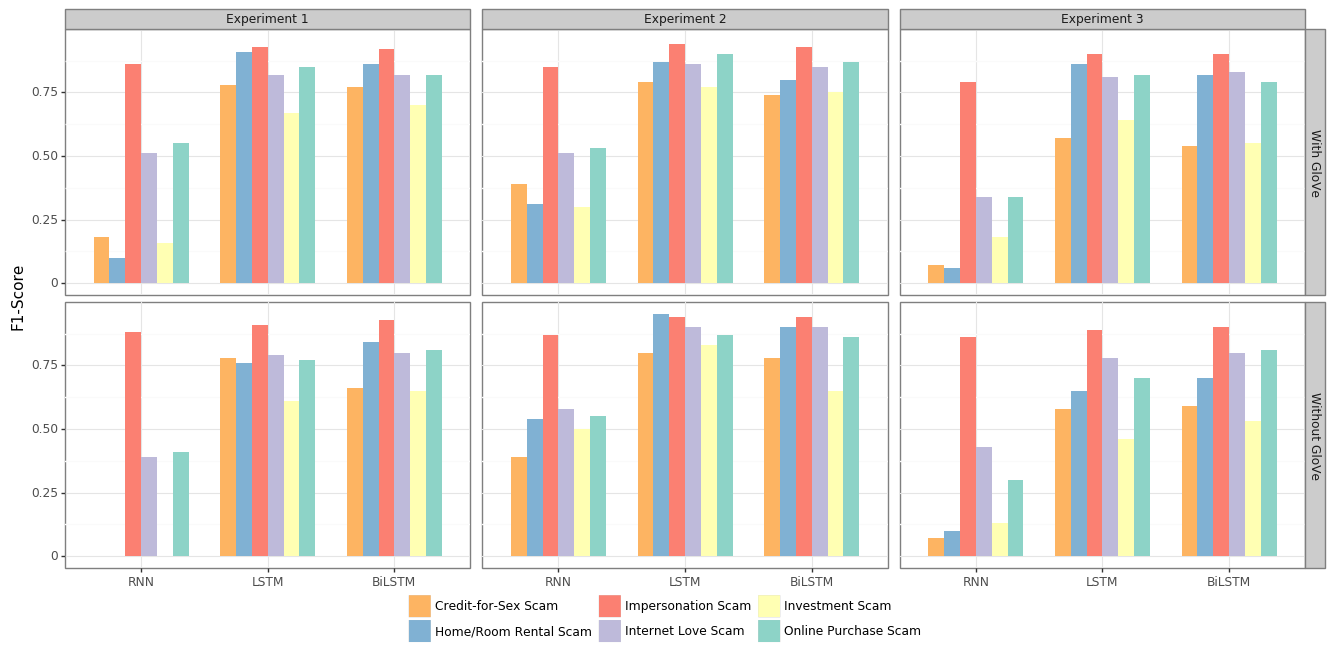

<ggplot: (-9223371866077650720)>

In [27]:
g6 = (p9.ggplot(data=all_models_df,
        mapping=p9.aes(x='model', fill='scam_type'))
+ p9.geom_col(mapping=p9.aes(y='f1-score'), position='dodge', width=0.75, show_legend=True)
+ p9.facet_grid('glove ~ experiment')
+ p9.theme_bw() 
+ p9.ylab("F1-Score")
+ p9.xlab("") 
+ p9.theme(legend_title=element_blank(), legend_position='bottom', subplots_adjust={'wspace': 0.03}, figure_size=(16, 7), axis_text_x = p9.element_text(rotation=0))
# + p9.geom_text(p9.aes(y='f1-score', label='f1-score', angle=0), position=position_dodge(width=0.9), size=7, va='bottom', ha='center')
+ p9.scale_fill_brewer(type='qual', palette='Set3', direction=-1)
)

g6

In [28]:
# Save the plot
# g6.save("Figures/f1_score.png", width=10, height=5, dpi=800)